<a href="https://colab.research.google.com/github/Rushikesh419/Machine-learning/blob/main/hierarchial_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df=pd.read_csv('/content/mpg.csv')

In [141]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [143]:
df['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: horsepower, Length: 94, dtype: int64

In [144]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [145]:
df['horsepower']=df['horsepower'].replace('?','150')

In [146]:
df['horsepower'] = df['horsepower'].astype(float)

In [147]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,105.155779,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.600986,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [148]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [149]:
df['name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

In [150]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [161]:
encoded_df = pd.get_dummies(df.drop('name',axis=1), columns=['origin'])

In [162]:
encoded_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [163]:
from sklearn.preprocessing import MinMaxScaler

In [164]:
scaler=MinMaxScaler()

In [166]:
scaled_data=scaler.fit_transform(encoded_df)

In [167]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 1.        , 0.        ,
        0.        ],
       [0.15957447, 1.        , 0.72868217, ..., 1.        , 0.        ,
        0.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 1.        , 0.        ,
        0.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 1.        , 0.        ,
        0.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 1.        , 0.        ,
        0.        ]])

In [168]:
scaled_df=pd.DataFrame(scaled_data,columns=encoded_df.columns)

In [169]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,1.0,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,1.0,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,1.0,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,1.0,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,1.0,0.0,0.0
394,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.0,1.0,0.0
395,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,1.0,0.0,0.0
396,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,1.0,0.0,0.0


<Axes: >

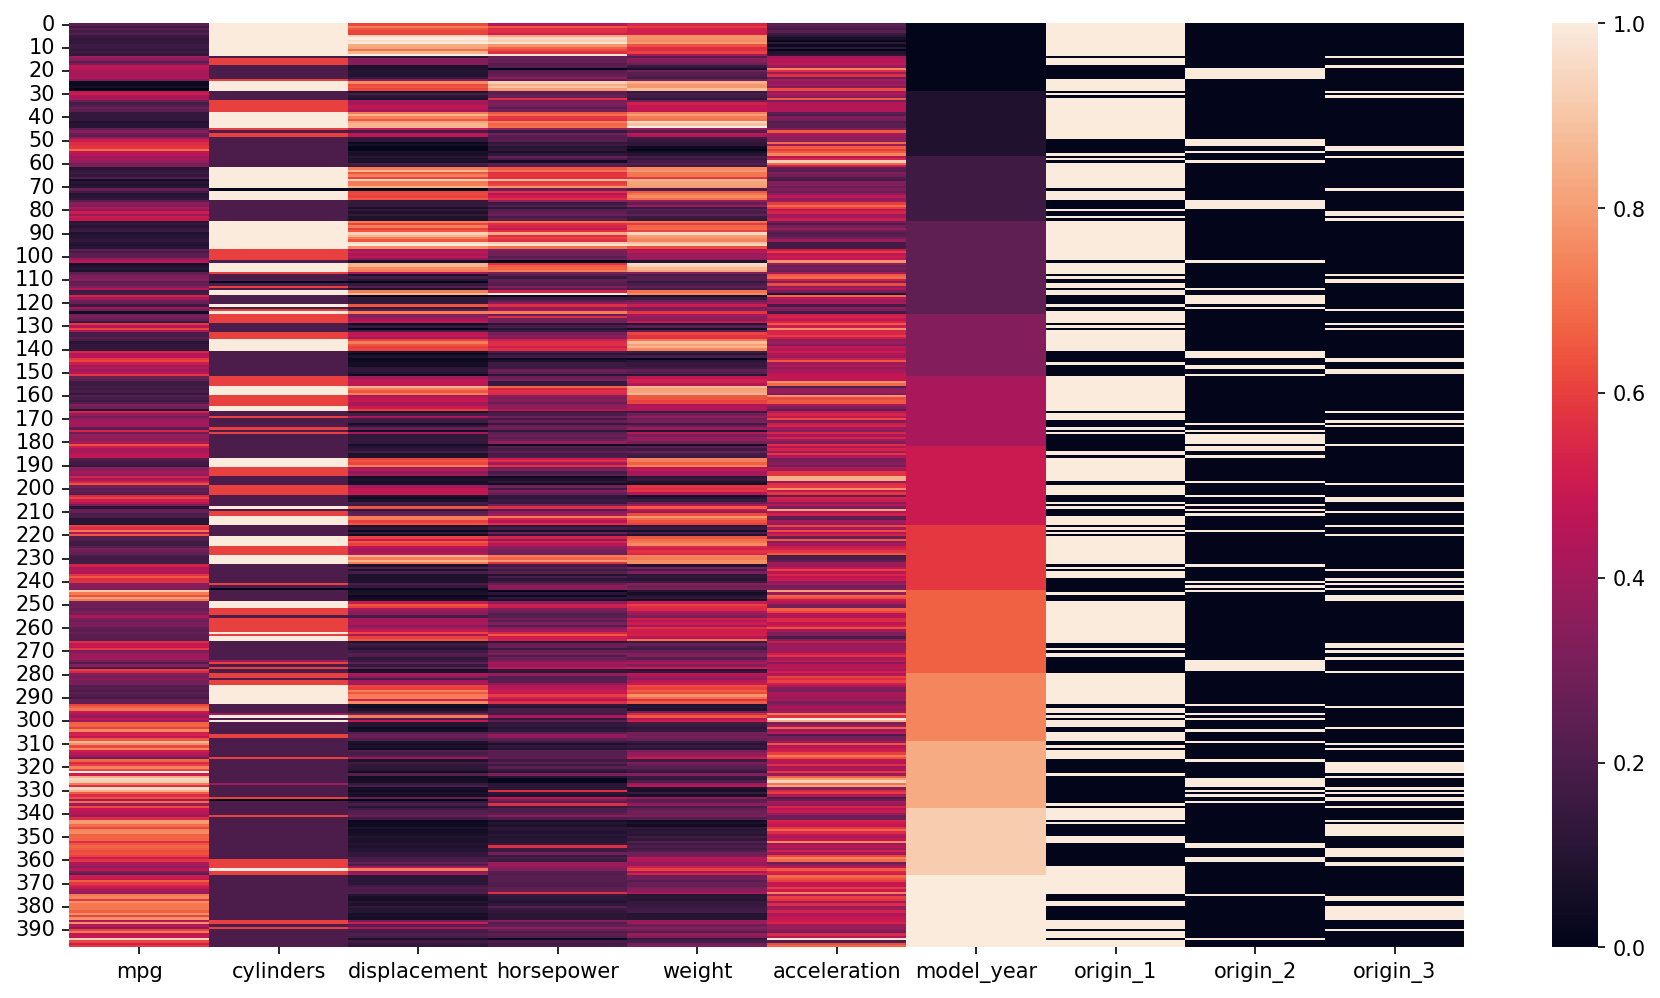

In [174]:
plt.figure(figsize=(15,8),dpi=150)
sns.heatmap(scaled_df)

<Figure size 2250x1200 with 0 Axes>

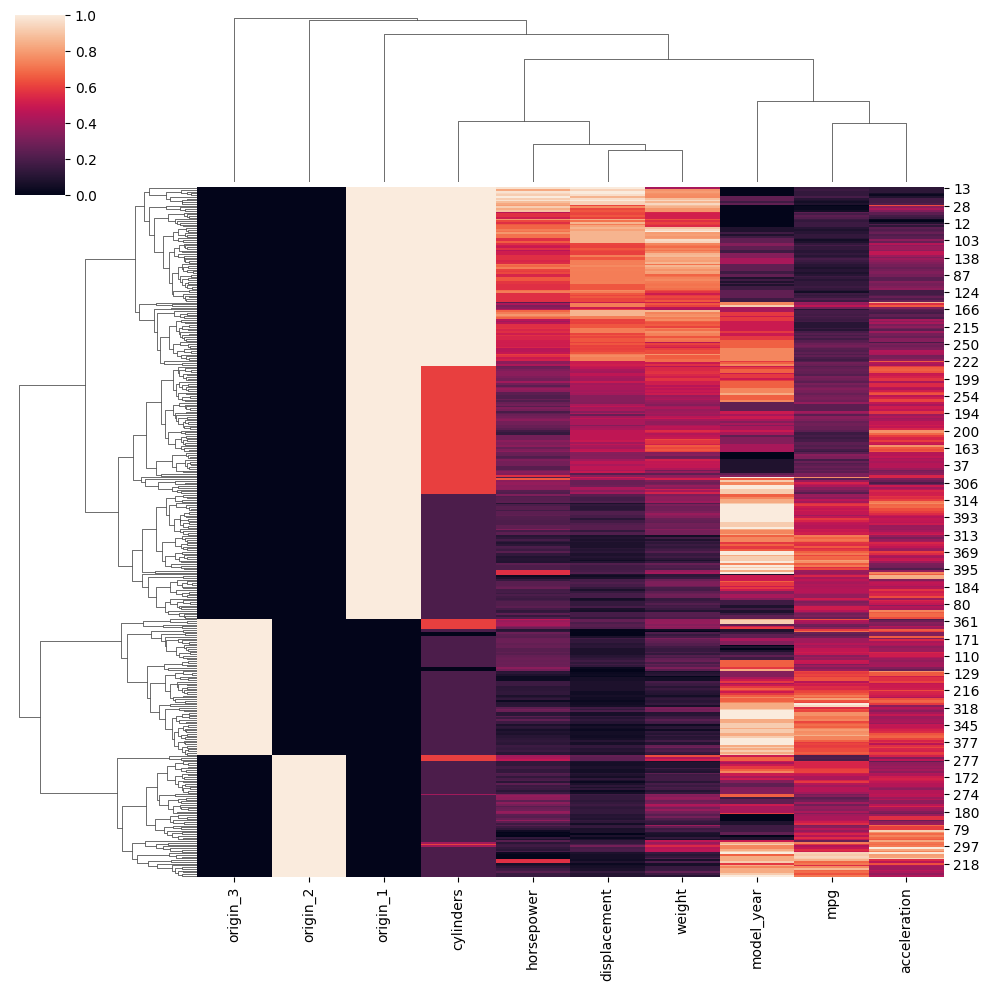

In [175]:
plt.figure(figsize=(15,8),dpi=150)
sns.clustermap(scaled_df)

<Figure size 2250x1200 with 0 Axes>

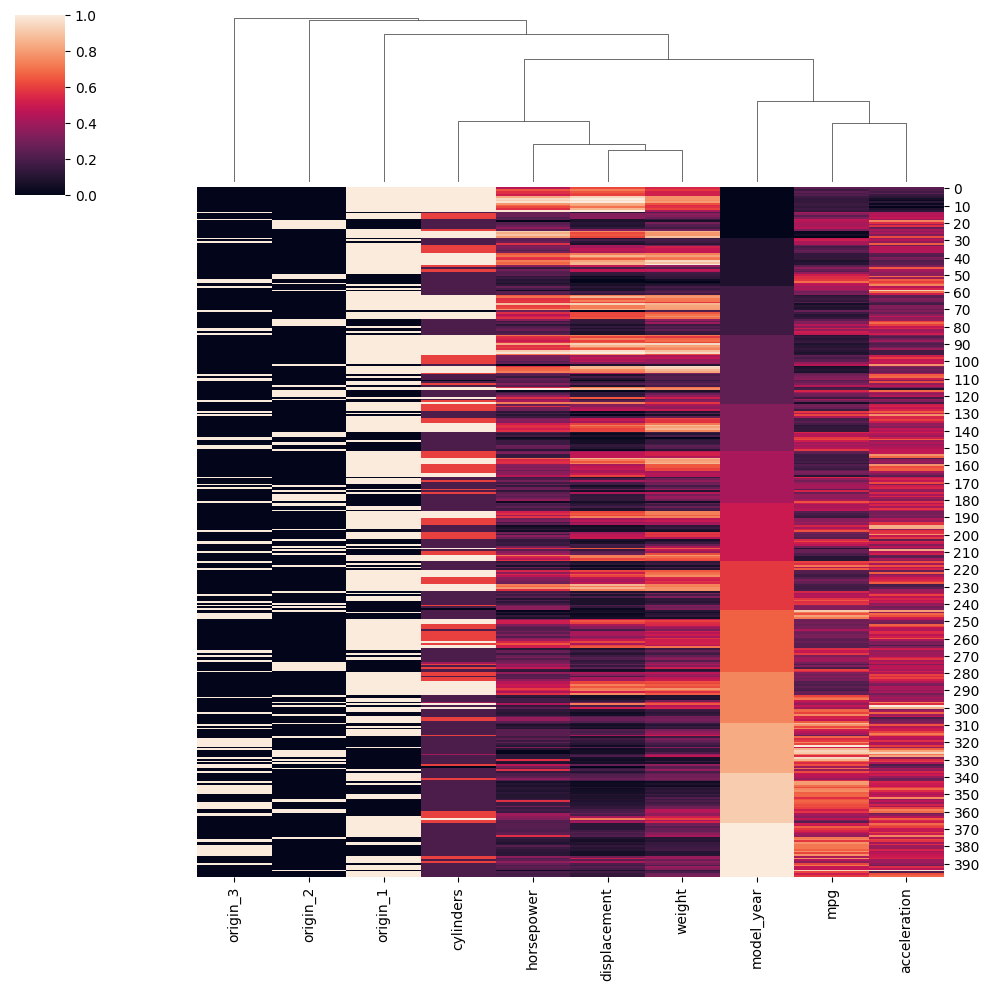

In [176]:
plt.figure(figsize=(15,8),dpi=150)
sns.clustermap(scaled_df,row_cluster=False)

<Figure size 2250x1200 with 0 Axes>

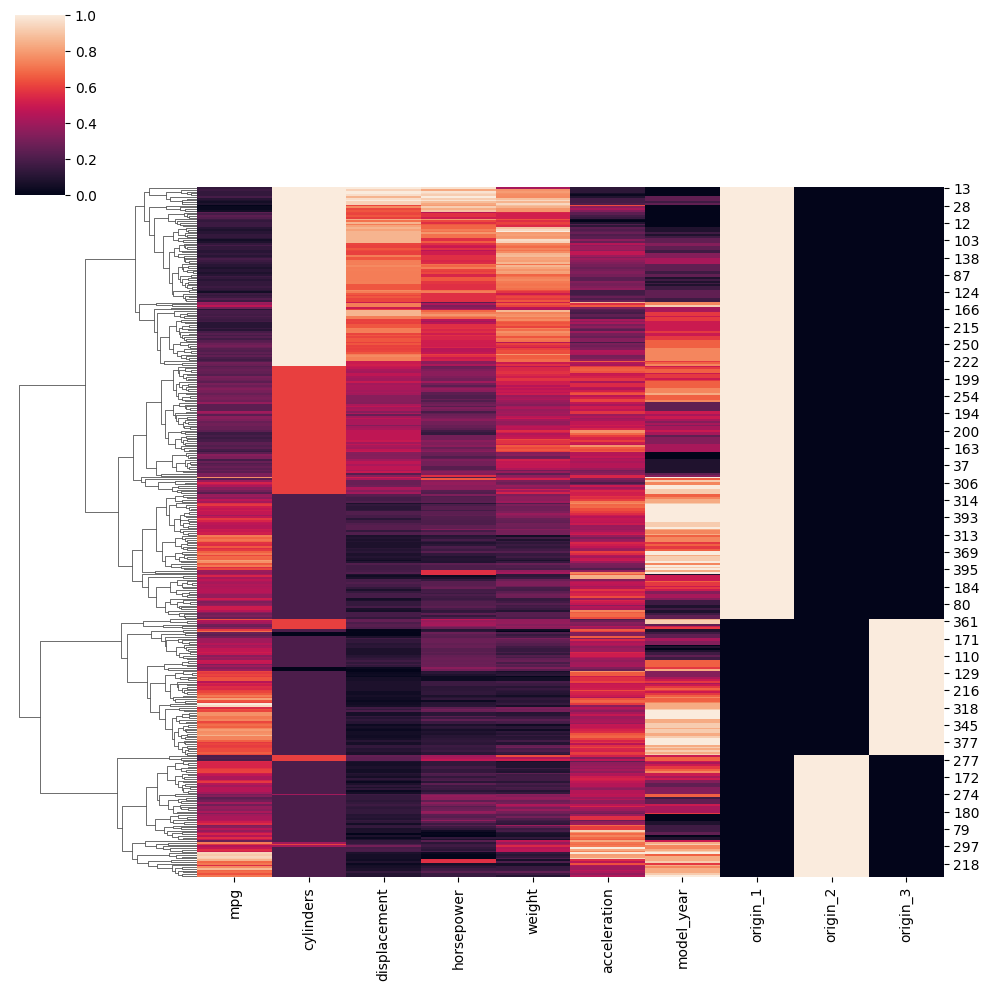

In [178]:
plt.figure(figsize=(15,8),dpi=150)
sns.clustermap(scaled_df,col_cluster=False)

In [177]:
scaled_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
mpg,1.000000,-0.775396,-0.804203,-0.753177,-0.831741,0.420289,0.579267,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.818454,0.896017,-0.505419,-0.348746,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.873330,0.932824,-0.543684,-0.370164,0.651407,-0.373886,-0.433505
horsepower,-0.753177,0.818454,0.873330,1.000000,0.841770,-0.665833,-0.397772,0.482533,-0.270967,-0.326840
weight,-0.831741,0.896017,0.932824,0.841770,1.000000,-0.417457,-0.306564,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.665833,-0.417457,1.000000,0.288137,-0.250806,0.204473,0.109144
model_year,0.579267,-0.348746,-0.370164,-0.397772,-0.306564,0.288137,1.000000,-0.139883,-0.024489,0.193101
origin_1,-0.568192,0.604351,0.651407,0.482533,0.598398,-0.250806,-0.139883,1.000000,-0.597198,-0.643317
origin_2,0.259022,-0.352861,-0.373886,-0.270967,-0.298843,0.204473,-0.024489,-0.597198,1.000000,-0.229895
origin_3,0.442174,-0.396479,-0.433505,-0.326840,-0.440817,0.109144,0.193101,-0.643317,-0.229895,1.000000


In [179]:
from sklearn.cluster import AgglomerativeClustering

In [180]:
model=AgglomerativeClustering(n_clusters=4)

In [182]:
cluster_label=model.fit_predict(scaled_df)

In [184]:
cluster_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0,
       3, 3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2,
       0, 2, 2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2,
       3, 0, 0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0,
       3, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3,
       2, 3, 2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1,

<Axes: xlabel='mpg', ylabel='weight'>

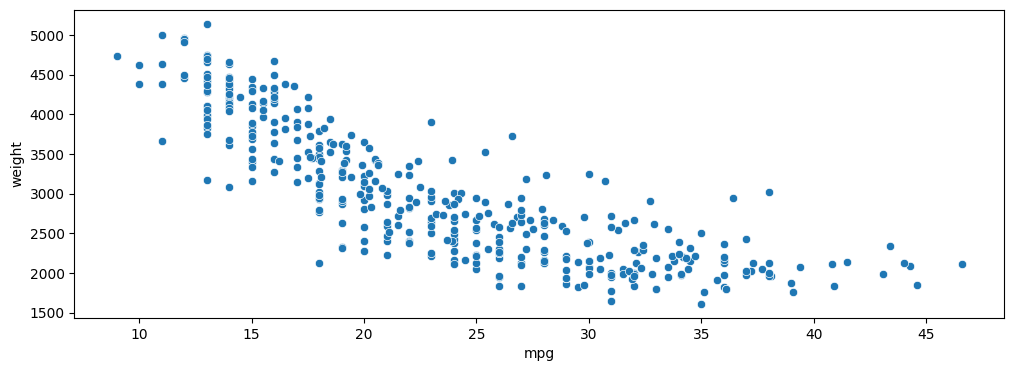

In [186]:
plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(data=df,x='mpg',y='weight')

<Axes: xlabel='mpg', ylabel='weight'>

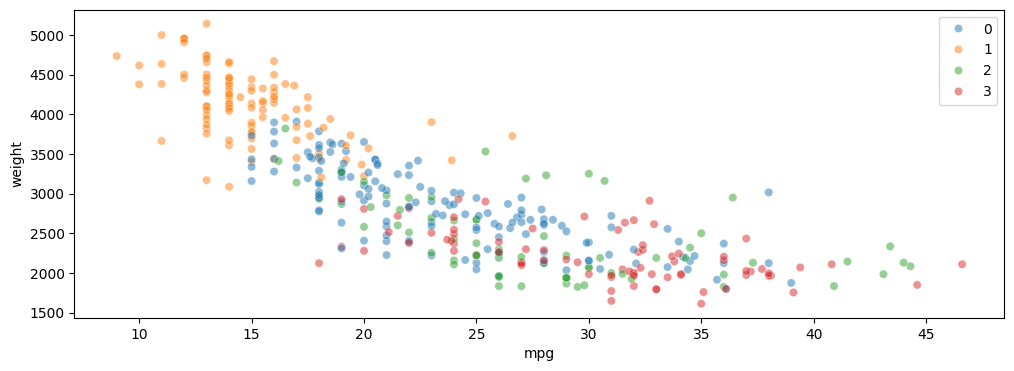

In [190]:
plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(data=df,x='mpg',y='weight',hue=cluster_label,palette='tab10',alpha=0.5)

In [192]:
# max dist
len(scaled_df.columns)

10

In [193]:
np.sqrt(10) # max dist possible between 2 points

3.1622776601683795

In [194]:
model=AgglomerativeClustering(n_clusters=None,distance_threshold=2)

In [195]:
cluster_label=model.fit_predict(scaled_df)

In [196]:
cluster_label

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  7,  4,
        4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,
        0,  0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        0,  3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,
        0,  0,  3,  0, 10,  3,  4,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,
        3,  3,  3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,
        4,  4,  4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,
        7,  1,  0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,
        5,  5,  5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,
        1,  1,  7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,
        5,  5,  5,  5,  9

In [197]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [198]:
linkage_matrix=hierarchy.linkage(model.children_)

In [199]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [335.        , 789.        ,  59.50630219, 395.        ],
       [340.        , 790.        ,  68.00735254, 396.        ],
       [353.        , 791.        ,  78.31347266, 397.        ]])

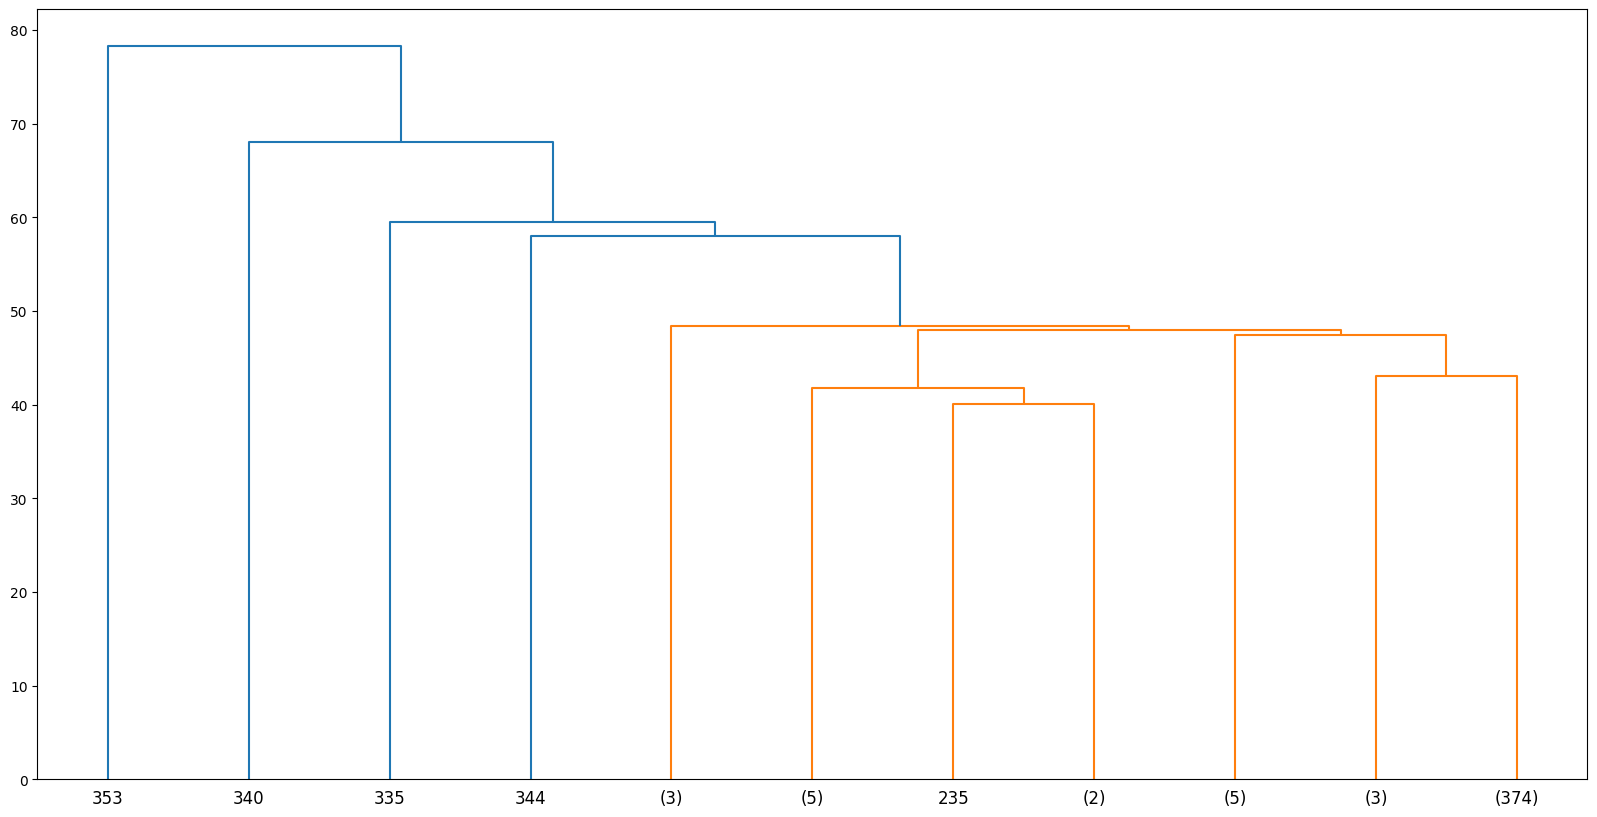

In [201]:
plt.figure(figsize=(20,10))
dendro=dendrogram(linkage_matrix,truncate_mode='lastp',p=11)